In [ ]:
# import block
import os
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import keras
from sklearn.metrics import mean_squared_error
import time
from functools import partialmethod
from numpy.core.fromnumeric import mean
import math
from sklearn.utils import shuffle
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

input_dir_path = "/content/drive/MyDrive/6373-HW/HW-2"     # Directory for datasets

os.chdir(input_dir_path)      # Changed current directory for above path

covertype_df = pd.read_excel("covtype.xlsx")
covertype_df

In [ ]:
undersample_df = covertype_df.loc[covertype_df[54].isin( [1,2,3,7])]
undersample_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
11,2886,151,11,371,26,5253,234,240,136,4051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
12,2742,134,22,150,69,3215,248,224,92,6091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
undersample_df_x = undersample_df.drop(54,axis=1)
undersample_df_x
undersample_df_y = undersample_df[54]
undersample_df_y

2         2
3         2
5         2
11        2
12        2
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: 54, Length: 551405, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss 
from imblearn.over_sampling import SMOTE

In [ ]:
nm = NearMiss()
undersample_df_x_f,undersample_df_y_f = nm.fit_resample(undersample_df_x,undersample_df_y)

In [ ]:
undersample_df_x_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,3267,74,17,270,33,3654,238,205,92,1736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3275,78,22,300,41,3684,242,193,69,1707,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3201,89,16,0,0,2945,243,212,93,2445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3209,97,13,30,6,2969,241,221,108,2412,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3250,67,10,210,16,3589,231,219,120,1790,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82035,3304,59,21,30,-2,2468,231,190,83,4072,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
82036,3338,62,7,30,-4,2340,226,226,134,4089,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
82037,3335,56,11,30,-1,2368,227,218,123,4091,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
82038,3329,63,15,30,-2,2395,232,207,104,4093,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
oversample_df = covertype_df.loc[covertype_df[54].isin( [4,5,6,7])]
oversample_df
oversample_df_x = oversample_df.drop(54,axis=1)
oversample_df_x
oversample_df_y = oversample_df[54]
oversample_df_y

0         5
1         5
4         5
6         5
7         5
         ..
580402    6
580403    6
580404    6
580405    6
580448    6
Name: 54, Length: 50117, dtype: int64

In [ ]:
sm = SMOTE()
oversample_df_x_f,oversample_df_y_f = sm.fit_resample(oversample_df_x,oversample_df_y)

In [ ]:
oversample_df_x_f[54] = oversample_df_y_f
oversample_df_x_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
4,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82035,2521,102,5,95,9,192,230,232,134,1705,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
82036,2610,337,12,43,1,1962,193,222,168,2698,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
82037,2494,335,22,113,22,815,164,204,176,689,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
82038,2429,79,20,40,11,955,241,198,77,904,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [ ]:
undersample_df_x_f[54] = undersample_df_y_f
undersample_df_x_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,3267,74,17,270,33,3654,238,205,92,1736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,3275,78,22,300,41,3684,242,193,69,1707,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,3201,89,16,0,0,2945,243,212,93,2445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3209,97,13,30,6,2969,241,221,108,2412,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,3250,67,10,210,16,3589,231,219,120,1790,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82035,3304,59,21,30,-2,2468,231,190,83,4072,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
82036,3338,62,7,30,-4,2340,226,226,134,4089,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
82037,3335,56,11,30,-1,2368,227,218,123,4091,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
82038,3329,63,15,30,-2,2395,232,207,104,4093,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7


In [ ]:
undersample_df_x_f_data =  undersample_df_x_f.loc[undersample_df_x_f[54].isin( [1,2,3])]
undersample_df_x_f_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,3267,74,17,270,33,3654,238,205,92,1736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,3275,78,22,300,41,3684,242,193,69,1707,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,3201,89,16,0,0,2945,243,212,93,2445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3209,97,13,30,6,2969,241,221,108,2412,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,3250,67,10,210,16,3589,231,219,120,1790,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61525,2291,4,16,67,16,691,198,208,146,600,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
61526,2288,132,21,60,13,684,249,223,92,721,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
61527,2463,4,17,600,221,1284,195,205,145,541,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
61528,2369,167,26,150,26,443,230,239,122,552,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
full_data = pd.concat([undersample_df_x_f_data,oversample_df_x_f])
full_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,3267,74,17,270,33,3654,238,205,92,1736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,3275,78,22,300,41,3684,242,193,69,1707,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,3201,89,16,0,0,2945,243,212,93,2445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3209,97,13,30,6,2969,241,221,108,2412,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,3250,67,10,210,16,3589,231,219,120,1790,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82035,2521,102,5,95,9,192,230,232,134,1705,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
82036,2610,337,12,43,1,1962,193,222,168,2698,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
82037,2494,335,22,113,22,815,164,204,176,689,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
82038,2429,79,20,40,11,955,241,198,77,904,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [ ]:
full_data.to_csv("cov_data.csv")

In [ ]:
full_data = full_data.reset_index(drop=True)

In [ ]:
full_data.to_csv("cov_data.csv")

**Run from here**

In [ ]:
input_dir_path = ""     # Directory for datasets

os.chdir(input_dir_path)      # Changed current directory for above path

full_data = pd.read_csv("") # File name to access the dataset

In [ ]:
full_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,0,3267,74,17,270,33,3654,238,205,92,1736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,3275,78,22,300,41,3684,242,193,69,1707,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2,3201,89,16,0,0,2945,243,212,93,2445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3209,97,13,30,6,2969,241,221,108,2412,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,4,3250,67,10,210,16,3589,231,219,120,1790,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143565,143565,2521,102,5,95,9,192,230,232,134,1705,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
143566,143566,2610,337,12,43,1,1962,193,222,168,2698,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
143567,143567,2494,335,22,113,22,815,164,204,176,689,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
143568,143568,2429,79,20,40,11,955,241,198,77,904,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [ ]:
full_data = full_data.drop("Unnamed: 0",axis=1)
full_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,3267,74,17,270,33,3654,238,205,92,1736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,3275,78,22,300,41,3684,242,193,69,1707,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,3201,89,16,0,0,2945,243,212,93,2445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3209,97,13,30,6,2969,241,221,108,2412,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,3250,67,10,210,16,3589,231,219,120,1790,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143565,2521,102,5,95,9,192,230,232,134,1705,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
143566,2610,337,12,43,1,1962,193,222,168,2698,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
143567,2494,335,22,113,22,815,164,204,176,689,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
143568,2429,79,20,40,11,955,241,198,77,904,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


# Data Preprocessing

In [ ]:
x_df = full_data.drop(full_data.columns[[54]],axis=1)
x_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,3267,74,17,270,33,3654,238,205,92,1736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3275,78,22,300,41,3684,242,193,69,1707,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3201,89,16,0,0,2945,243,212,93,2445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3209,97,13,30,6,2969,241,221,108,2412,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3250,67,10,210,16,3589,231,219,120,1790,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143565,2521,102,5,95,9,192,230,232,134,1705,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143566,2610,337,12,43,1,1962,193,222,168,2698,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143567,2494,335,22,113,22,815,164,204,176,689,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143568,2429,79,20,40,11,955,241,198,77,904,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_df = full_data.iloc[:,54]
y_df

0         1
1         1
2         1
3         1
4         1
         ..
143565    6
143566    6
143567    6
143568    6
143569    6
Name: 54, Length: 143570, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=25,stratify=y_df)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
30880,3372,307,19,1064,269,3947,163,225,200,2460,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
122065,2043,42,7,18,0,761,223,228,139,646,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18331,3254,151,15,339,27,1430,238,239,127,2516,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12204,3265,175,8,180,36,1253,225,244,153,953,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58773,2309,147,22,90,25,1510,243,231,105,759,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128843,2247,109,27,137,60,1010,253,196,51,1285,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101150,3296,342,17,582,180,3652,184,213,167,3608,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
51999,2536,81,6,300,53,153,228,230,136,1873,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50880,2461,177,28,153,56,1198,221,242,135,1087,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
23547,3141,245,12,170,10,1987,194,249,192,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
136881,2806,82,31,196,134,1406,244,169,30,977,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50014,2525,113,13,60,-17,1317,242,226,110,1448,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44996,2598,127,12,268,28,1423,240,232,121,1077,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11293,3244,91,12,150,31,3398,238,221,111,3937,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139834,2732,337,17,95,20,1572,178,211,171,1248,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33615,3086,137,10,216,-6,4068,235,237,132,2681,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
131700,2900,91,10,256,39,2284,236,223,117,663,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1455,3199,78,15,150,6,2608,238,211,99,1574,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
Y_test

23547     2
136881    5
50014     3
44996     3
11293     1
         ..
139834    5
33615     2
131700    5
1455      1
114621    4
Name: 54, Length: 28714, dtype: int64

In [ ]:
Y_train

30880     2
122065    4
18331     1
12204     1
58773     3
         ..
128843    4
101150    7
51999     3
50880     3
104845    7
Name: 54, Length: 114856, dtype: int64

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(Y_train)
true_y_train = lb.transform(Y_train)
true_y_train
true_y_test = lb.transform(Y_test)
true_y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Simple Sequential Multi-layer Perceptron Architecture

In [ ]:
input_shape = (54,)
model = Sequential()
model.add(Dense(54, input_shape=input_shape, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(7, activation='softmax'))

loss_function = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
model_optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_function,optimizer=model_optimizer,metrics=["accuracy"])

start_time_basic = time.time()

history = model.fit(X_train,true_y_train,epochs=10,batch_size=int(len(X_train)/50),validation_data=(X_test,true_y_test))

end_time_basic = time.time()

comp_time_basic = end_time_basic - start_time_basic

Epoch 1/10
51/51 [==============================] - 4s 34ms/step - loss: 60.0869 - accuracy: 0.1831 - val_loss: 12.3751 - val_accuracy: 0.2331
Epoch 2/10
51/51 [==============================] - 1s 18ms/step - loss: 7.8737 - accuracy: 0.2829 - val_loss: 5.3577 - val_accuracy: 0.3351
Epoch 3/10
51/51 [==============================] - 1s 15ms/step - loss: 4.3790 - accuracy: 0.3671 - val_loss: 3.6801 - val_accuracy: 0.4035
Epoch 4/10
51/51 [==============================] - 1s 12ms/step - loss: 3.1662 - accuracy: 0.4163 - val_loss: 3.0228 - val_accuracy: 0.4226
Epoch 5/10
51/51 [==============================] - 1s 14ms/step - loss: 2.6126 - accuracy: 0.4472 - val_loss: 3.3044 - val_accuracy: 0.4315
Epoch 6/10
51/51 [==============================] - 1s 11ms/step - loss: 2.4517 - accuracy: 0.4682 - val_loss: 3.0482 - val_accuracy: 0.4297
Epoch 7/10
51/51 [==============================] - 1s 12ms/step - loss: 2.2357 - accuracy: 0.4863 - val_loss: 3.3379 - val_accuracy: 0.4053
Epoch 8/10


In [ ]:
comp_time_basic

10.650203704833984

In [ ]:
y_hat = model.predict(X_train)
train_cre = -1 * tf.math.log(y_hat) * true_y_train
np.nanmean(train_cre,axis=0)

array([0.36018458, 0.19501184, 0.32915115, 0.09706347, 0.11270034,
       0.22418   , 0.1689207 ], dtype=float32)

In [ ]:
y_hat

array([[8.27462506e-03, 8.03352296e-01, 9.00948976e-07, ...,
        3.26626562e-03, 2.16061202e-22, 1.85105950e-01],
       [8.13180190e-10, 1.31035769e-08, 2.01920210e-03, ...,
        4.05296705e-05, 8.89823074e-04, 2.79370588e-15],
       [1.41323537e-01, 8.43246043e-01, 1.69154788e-07, ...,
        1.53832482e-02, 1.11077452e-05, 3.59574660e-05],
       ...,
       [2.83815364e-14, 1.03309184e-11, 9.98707056e-01, ...,
        1.28996442e-03, 4.96386576e-09, 2.19337448e-16],
       [6.86672865e-06, 8.61747831e-05, 6.11890674e-01, ...,
        7.34880045e-02, 2.45652020e-01, 3.49192064e-11],
       [2.16802806e-01, 1.07550576e-01, 1.15366274e-04, ...,
        1.94352157e-02, 1.39061434e-04, 6.55957043e-01]], dtype=float32)

In [ ]:
y_hat_test = model.predict(X_test)
test_cre = -1 * tf.math.log(y_hat_test) * true_y_test
np.nanmean(test_cre,axis=0)

array([0.36124635, 0.1928487 , 0.3352604 , 0.09654032, 0.11230642,
       0.22957855, 0.17098275], dtype=float32)

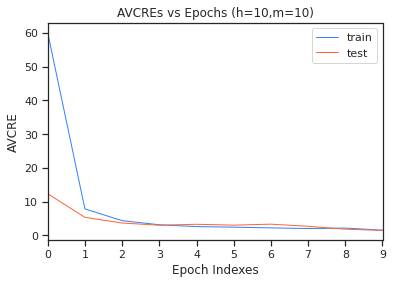

In [ ]:
sns.set_style(style="ticks")
plt.plot(history.history["loss"], color='#3380FF', linewidth=1)
plt.plot(history.history["val_loss"], color='#FF6433', linewidth=1)
plt.ylabel('AVCRE')
plt.xlabel('Epoch Indexes')
plt.xlim(0,9)
plt.title("AVCREs vs Epochs (h=10,m=10)")
plt.legend(['train', 'test'], loc='best')
plt.show()

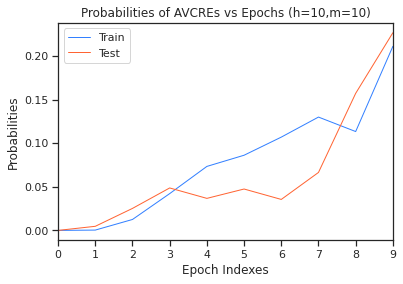

In [ ]:
plt.plot(np.exp( list(-np.array(history.history["loss"]))), color='#3380FF', linewidth=1)
plt.plot(np.exp( list(-np.array(history.history["val_loss"]))), color='#FF6433', linewidth=1)
plt.ylabel('Probabilities')
plt.xlabel('Epoch Indexes')
plt.title("Probabilities of AVCREs vs Epochs (h=10,m=10)")
plt.xlim(0,9)
plt.legend(['Train', 'Test'], loc='best')
plt.show()


# PCA Analysis


In [ ]:


rescale_df = StandardScaler().fit_transform(x_df.drop(full_data.columns[[20,21,22,38]],axis=1))
SDATA = pd.DataFrame(rescale_df)

feature_correlation = SDATA.corr()

feature_eigen_values, feature_eigen_vectors = eig(feature_correlation)

feature_eigen_vectors = pd.DataFrame(feature_eigen_vectors)

L = np.sort(feature_eigen_values)[::-1]

idx = np.argsort(-1)

# Computation of PEV for each case m

PEV = []

for i in range(50):
    a = sum(L[0:i]/50)
    PEV.append(a)

# PEV(m) vs m
r = []
for i in range(50):
    if sum(L[0:i]) > 0.9*50:
        r.append(i)

print(r)


[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


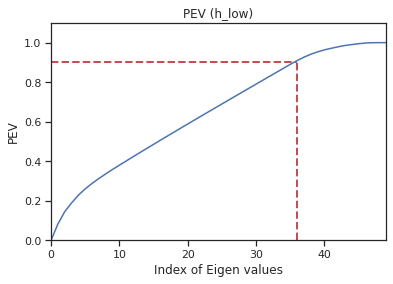

In [ ]:
m_for_eigen = list(range(0, 50))
plt.plot(m_for_eigen, PEV)
plt.hlines(y=0.9, xmin=0, xmax=36, color='r', linestyle='--', linewidth=2)
plt.vlines(x=36, ymin=0, ymax=0.9, color='r', linestyle='--', linewidth=2)
plt.xlabel("Index of Eigen values")
plt.ylabel("PEV")
plt.xlim(0,49)
plt.ylim(0,1.1)
plt.title("PEV (h_low)")
plt.show()

**H = H low = 36** 

# Sequential MLP Architecture -- MLP <sub>low</sub>

In [ ]:
input_shape = (54,)
model_pca = Sequential()
model_pca.add(Dense(54, input_shape=input_shape, activation='relu'))
model_pca.add(Dense(36, activation='relu'))
model_pca.add(Dense(7, activation='softmax'))

loss_function = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
model_pca_optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model_pca.compile(loss=loss_function,optimizer=model_pca_optimizer,metrics=["accuracy"])

start_time_low = time.time()

history_pca_low = model_pca.fit(X_train,true_y_train,epochs=50,batch_size=100,validation_data=(X_test,true_y_test))

end_time_low = time.time()

total_time_low = end_time_low-start_time_low

Epoch 1/50
1149/1149 [==============================] - 5s 4ms/step - loss: 10.1107 - accuracy: 0.4677 - val_loss: 1.5231 - val_accuracy: 0.5999
Epoch 2/50
1149/1149 [==============================] - 4s 3ms/step - loss: 1.2563 - accuracy: 0.5925 - val_loss: 1.2537 - val_accuracy: 0.5717
Epoch 3/50
1149/1149 [==============================] - 4s 3ms/step - loss: 1.1021 - accuracy: 0.6293 - val_loss: 1.0077 - val_accuracy: 0.6338
Epoch 4/50
1149/1149 [==============================] - 4s 4ms/step - loss: 0.9631 - accuracy: 0.6647 - val_loss: 1.0821 - val_accuracy: 0.6682
Epoch 5/50
1149/1149 [==============================] - 4s 3ms/step - loss: 0.9184 - accuracy: 0.6774 - val_loss: 1.8483 - val_accuracy: 0.5800
Epoch 6/50
1149/1149 [==============================] - 4s 3ms/step - loss: 0.8478 - accuracy: 0.6911 - val_loss: 0.9901 - val_accuracy: 0.6813
Epoch 7/50
1149/1149 [==============================] - 4s 4ms/step - loss: 0.7926 - accuracy: 0.7084 - val_loss: 0.6924 - val_accuracy

In [ ]:
total_time_low

197.95281505584717

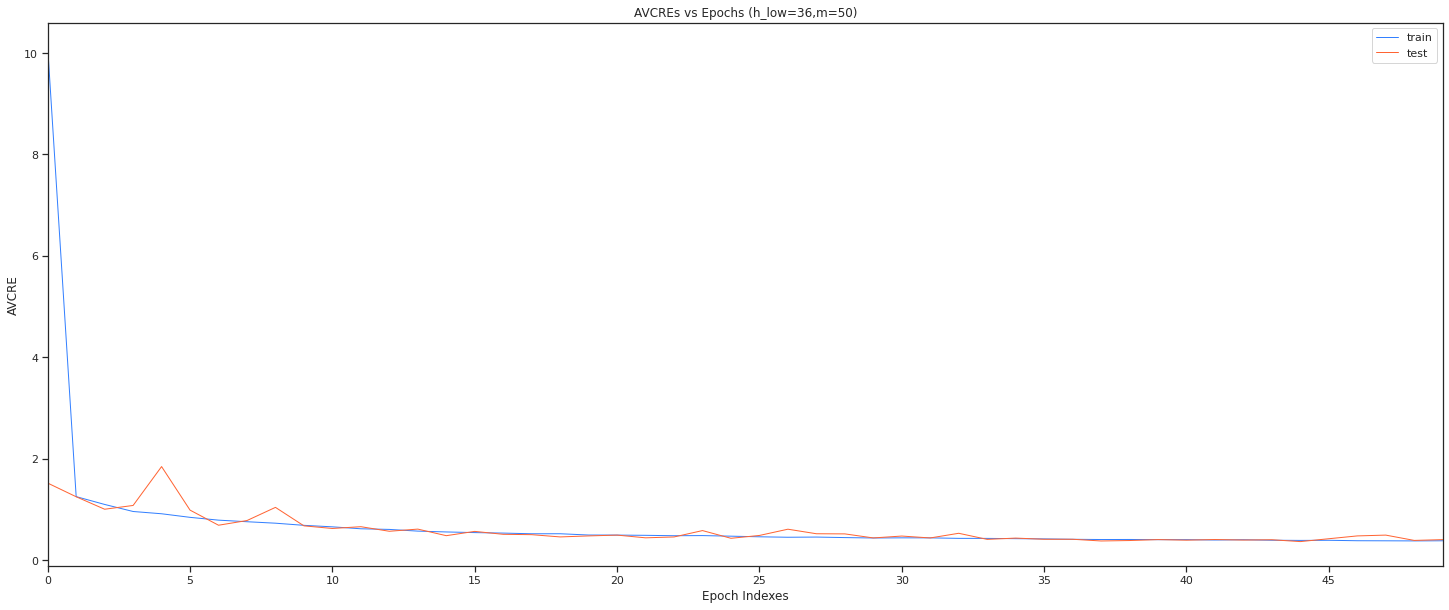

In [ ]:
x_ticks = range(0,50,5)

plt.figure(figsize=(25,10))
plt.plot(history_pca_low.history["loss"], color='#3380FF', linewidth=1)
plt.plot(history_pca_low.history["val_loss"], color='#FF6433', linewidth=1)
plt.ylabel('AVCRE')
plt.xlabel('Epoch Indexes')
plt.xlim(0,49)
plt.xticks(x_ticks)
plt.title("AVCREs vs Epochs (h_low=36,m=50)")
plt.legend(['train', 'test'], loc='best')
plt.show()

**m = 11**

In [ ]:
pca_y_hat_train = model_pca.predict(X_train)

In [ ]:
pca_y_predict = np.argmax(pca_y_hat_train,axis=1)
pca_y_predict = pca_y_predict+1
pca_y_predict

array([2, 4, 1, ..., 3, 3, 7])

In [ ]:
pca_train_confusion_matrix = confusion_matrix(pca_y_predict,Y_train)
pca_train_confusion_matrix = ((pca_train_confusion_matrix.astype('float') / pca_train_confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100).round(2)

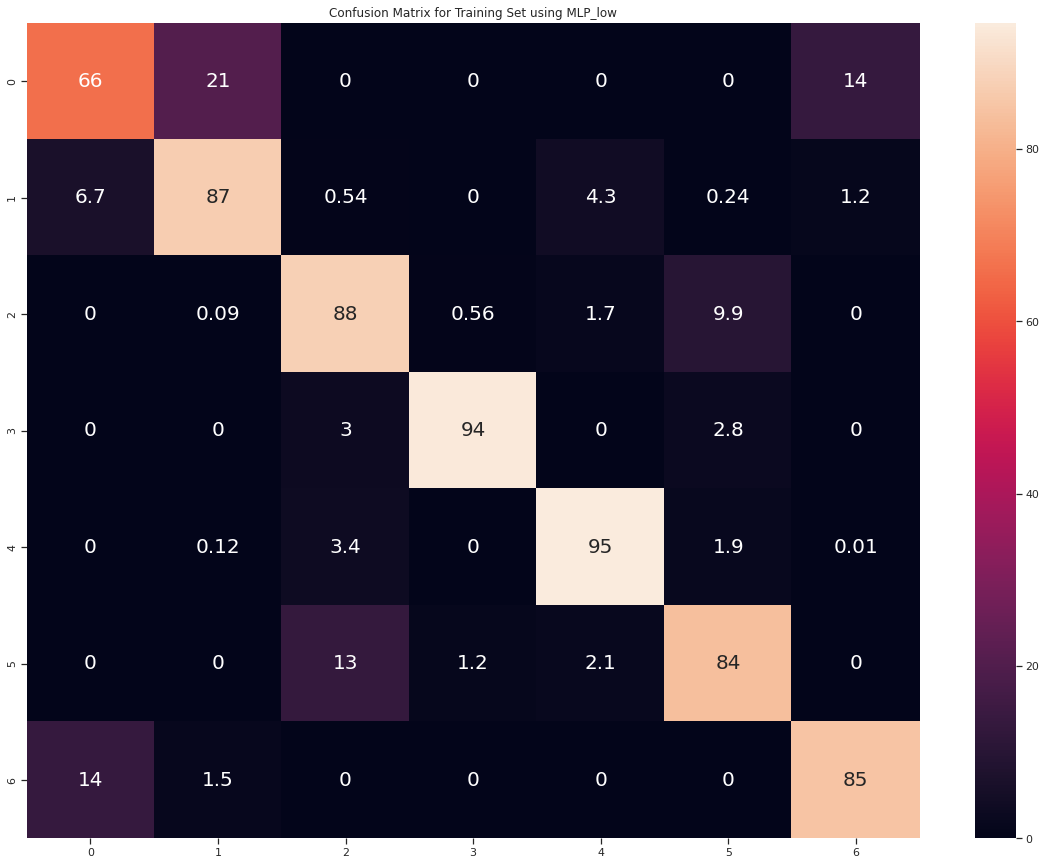

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(pca_train_confusion_matrix,annot=True,annot_kws={"size": 20})
plt.title("Confusion Matrix for Training Set using MLP_low")
plt.show()

In [ ]:
pca_y_hat_test = model_pca.predict(X_test)
pca_y_predict_test = np.argmax(pca_y_hat_test,axis=1)
pca_y_predict_test = pca_y_predict_test+1
pca_test_confusion_matrix = confusion_matrix(pca_y_predict_test,Y_test)
pca_test_confusion_matrix = ((pca_test_confusion_matrix.astype('float') / pca_test_confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100).round(2)


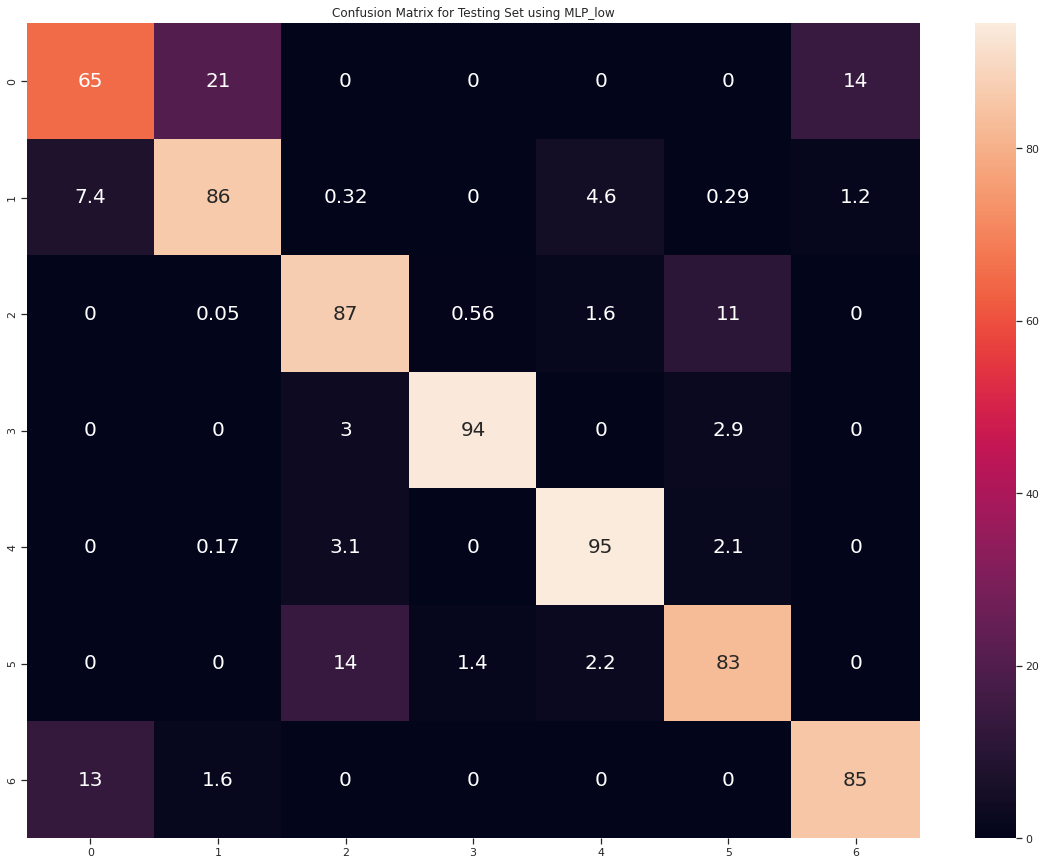

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(pca_test_confusion_matrix,annot=True,annot_kws={"size": 20})
plt.title("Confusion Matrix for Testing Set using MLP_low")
plt.show()

# PCA Analysis for each Class

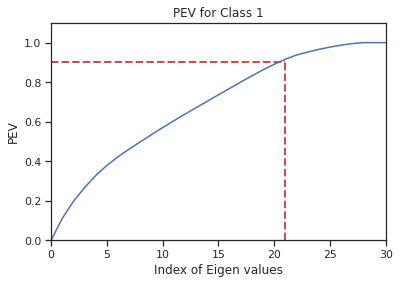

PEV for Class 1:21


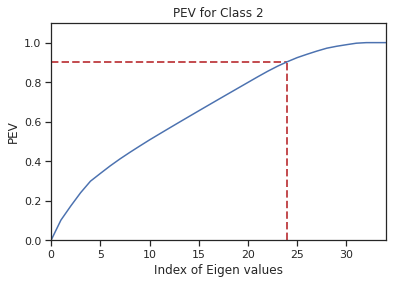

PEV for Class 2:24


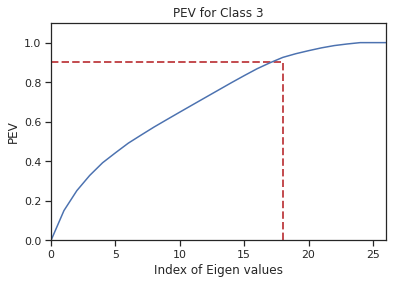

PEV for Class 3:18


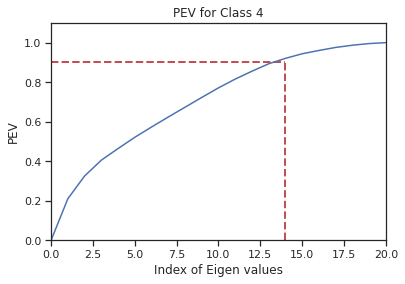

PEV for Class 4:14


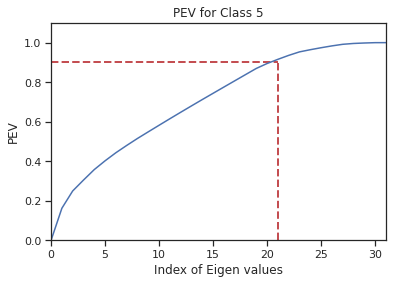

PEV for Class 5:21


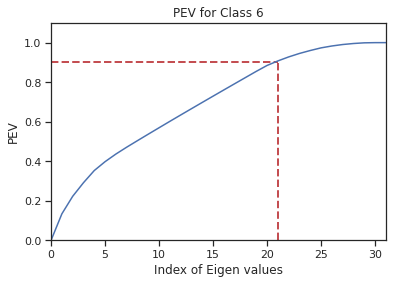

PEV for Class 6:21


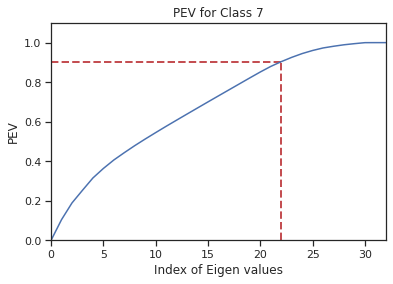

PEV for Class 7:22


In [ ]:
h_high = 0
for class_value in range(1,8):
  class_df = full_data.loc[full_data.iloc[:,54].isin([class_value])]

  drop_columns = list(map(int,full_data.columns[np.std(full_data.loc[full_data.iloc[:,54].isin([class_value])]) == 0]))
  drop_columns.append(54)
  rescale_df = StandardScaler().fit_transform(class_df.drop(full_data.columns[drop_columns],axis=1))
  SDATA = pd.DataFrame(rescale_df)

  feature_correlation = SDATA.corr()

  feature_eigen_values, feature_eigen_vectors = eig(feature_correlation)

  feature_eigen_vectors = pd.DataFrame(feature_eigen_vectors)

  L = np.sort(feature_eigen_values)[::-1]

  idx = np.argsort(-1)

  m_for_eigen = list(range(0, len(feature_correlation)))

  # Computation of PEV for each case m

  PEV = []

  for i in range(len(feature_correlation)):
      a = sum(L[0:i]/len(feature_correlation))
      PEV.append(a)

  # PEV(m) vs m
  r = []
  for i in range(len(feature_correlation)):
      if sum(L[0:i]) > 0.9*len(feature_correlation):
          r.append(i)

  plt.plot(m_for_eigen, PEV)
  plt.hlines(y=0.9, xmin=0, xmax=int(r[0]), color='r', linestyle='--', linewidth=2)
  plt.vlines(x=int(r[0]), ymin=0, ymax=0.9, color='r', linestyle='--', linewidth=2)
  plt.xlabel("Index of Eigen values")
  plt.ylabel("PEV")
  plt.xlim(0,len(feature_correlation)-1)
  plt.ylim(0,1.1)
  title = "PEV for Class "+str(class_value)
  plt.title(title)
  plt.show()

  print("PEV for Class "+str(class_value)+":"+str(r[0]))

  h_high = h_high + r[0]


In [ ]:
h_high

141

**H high = 141**

# Sequential MLP Architecture -- MLP <sub>high</sub>

In [ ]:
input_shape = (54,)
model_pca_high = Sequential()
model_pca_high.add(Dense(54, input_shape=input_shape, activation='relu'))
model_pca_high.add(Dense(148, activation='relu'))
model_pca_high.add(Dense(7, activation='softmax'))

loss_function = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
model_pca_high_optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model_pca_high.compile(loss=loss_function,optimizer=model_pca_high_optimizer,metrics=["accuracy"])

start_time_high = time.time()

history_pca_high = model_pca_high.fit(X_train,true_y_train,epochs=50,batch_size=100,validation_data=(X_test,true_y_test))

end_time_high = time.time()

total_time_high = end_time_high-start_time_high

Epoch 1/50
1149/1149 [==============================] - 5s 4ms/step - loss: 8.2811 - accuracy: 0.4180 - val_loss: 4.2913 - val_accuracy: 0.4675
Epoch 2/50
1149/1149 [==============================] - 5s 4ms/step - loss: 2.5779 - accuracy: 0.5499 - val_loss: 1.8081 - val_accuracy: 0.6055
Epoch 3/50
1149/1149 [==============================] - 4s 4ms/step - loss: 2.1172 - accuracy: 0.5964 - val_loss: 1.3231 - val_accuracy: 0.6387
Epoch 4/50
1149/1149 [==============================] - 4s 4ms/step - loss: 1.7676 - accuracy: 0.6325 - val_loss: 1.1963 - val_accuracy: 0.6854
Epoch 5/50
1149/1149 [==============================] - 5s 4ms/step - loss: 1.4693 - accuracy: 0.6545 - val_loss: 1.0347 - val_accuracy: 0.6999
Epoch 6/50
1149/1149 [==============================] - 5s 4ms/step - loss: 1.4117 - accuracy: 0.6693 - val_loss: 2.2988 - val_accuracy: 0.5866
Epoch 7/50
1149/1149 [==============================] - 4s 4ms/step - loss: 1.0707 - accuracy: 0.7037 - val_loss: 0.9263 - val_accuracy:

In [ ]:
total_time_high

262.6151776313782

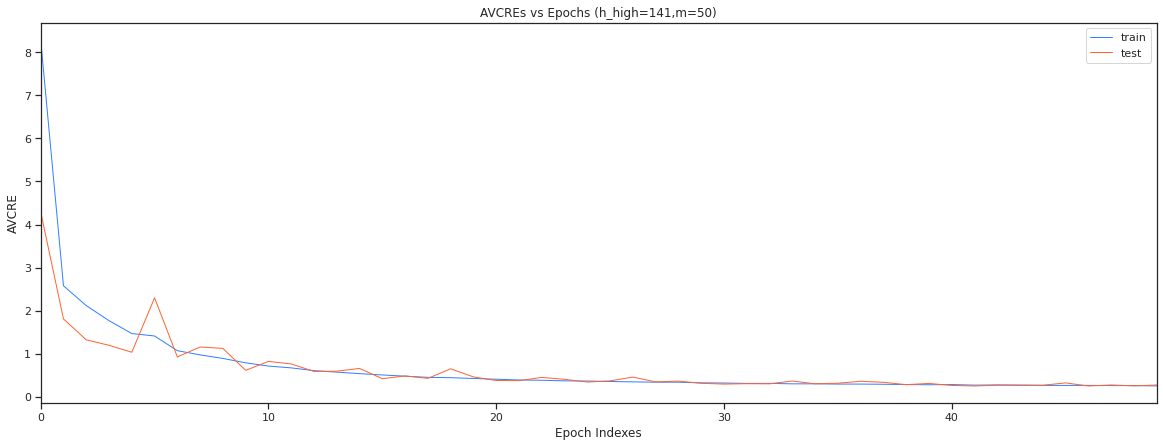

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(history_pca_high.history["loss"], color='#3380FF', linewidth=1)
plt.plot(history_pca_high.history["val_loss"], color='#FF6433', linewidth=1)
plt.ylabel('AVCRE')
plt.xlabel('Epoch Indexes')
plt.xlim(0,49)
plt.title("AVCREs vs Epochs (h_high=141,m=50)")
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
pca_y_hat_train_high = model_pca_high.predict(X_train)
pca_y_predict_train_high = np.argmax(pca_y_hat_train_high,axis=1)
pca_y_predict_train_high = pca_y_predict_train_high+1
pca_train_high_confusion_matrix = confusion_matrix(pca_y_predict_train_high,Y_train)
pca_train_high_confusion_matrix = ((pca_train_high_confusion_matrix.astype('float') / pca_train_high_confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100).round(2)

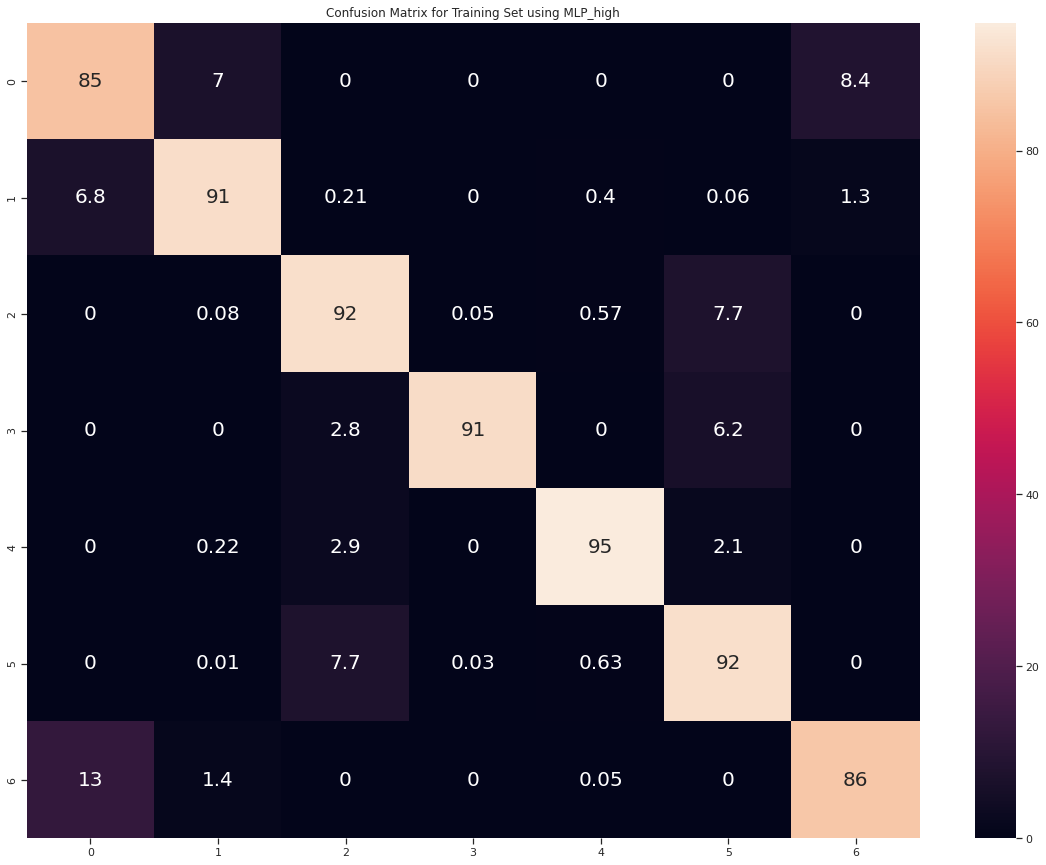

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(pca_train_high_confusion_matrix,annot=True,annot_kws={"size": 20})
plt.title("Confusion Matrix for Training Set using MLP_high")
plt.show()

In [ ]:
pca_y_hat_high_test = model_pca_high.predict(X_test)
pca_y_high_predict_test = np.argmax(pca_y_hat_high_test,axis=1)
pca_y_high_predict_test = pca_y_high_predict_test+1
pca_test_high_confusion_matrix = confusion_matrix(pca_y_high_predict_test,Y_test)
pca_test_high_confusion_matrix = ((pca_test_high_confusion_matrix.astype('float') / pca_test_high_confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100).round(2)

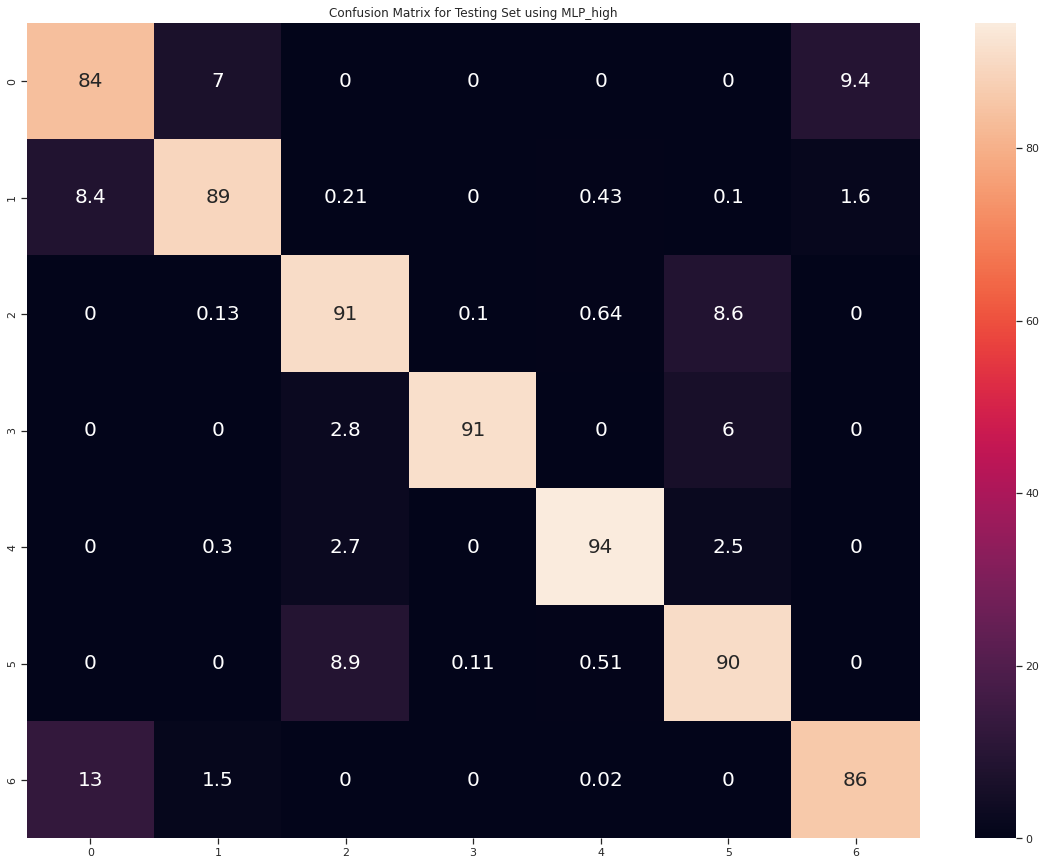

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(pca_test_high_confusion_matrix,annot=True,annot_kws={"size": 20})
plt.title("Confusion Matrix for Testing Set using MLP_high")
plt.show()

# Auto Encoder Neural Network

In [ ]:
high_weights = model_pca_high.layers[1].weights[0]
high_bias = model_pca_high.layers[1].weights[1]

In [ ]:
xn_df = x_df.copy()
zn = tf.keras.activations.relu(np.matmul(xn_df.to_numpy(),high_weights)+high_bias)

In [ ]:
zn_data = zn.numpy()
zn_data
zn_data_frame =pd.DataFrame(zn_data)

In [ ]:

zn_drop_columns_names = list(map(int,zn_data_frame.columns[np.std(zn_data_frame) == 0]))
ZN = zn_data_frame.drop(zn_data_frame.columns[zn_drop_columns_names],axis=1)   # Dropped the columns with 0 standard deviation

zn_data_scaled = StandardScaler().fit_transform(ZN)

zn_Zdata = pd.DataFrame(zn_data_scaled)

zn_feature_correlation = zn_Zdata.corr()

zn_feature_eigen_values, zn_feature_eigen_vectors = eig(zn_feature_correlation)

zn_feature_eigen_vectors = pd.DataFrame(zn_feature_eigen_vectors)

zn_L = np.sort(zn_feature_eigen_values)[::-1]

idx = np.argsort(-1)

m_for_eigen = list(range(0, len(zn_feature_correlation)))

# Computation of PEV for each case m

zn_PEV = []

for i in range(len(zn_feature_correlation)):
    zn_a = sum(zn_L[0:i]/len(zn_feature_correlation))
    zn_PEV.append(zn_a)

# PEV(m) vs m
r_2 = []
for i in range(len(zn_feature_correlation)):
    if sum(zn_L[0:i]) > 0.95*len(zn_feature_correlation):
        r_2.append(i)

print(r_2)


[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]


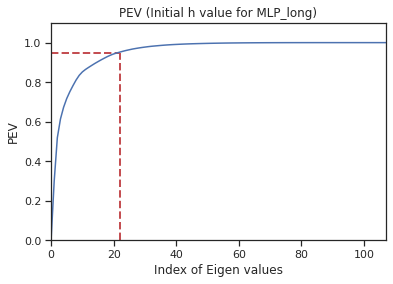

In [ ]:
plt.plot(m_for_eigen, zn_PEV)
plt.hlines(y=0.95, xmin=0, xmax=int(r_2[0]), color='r', linestyle='--', linewidth=2)
plt.vlines(x=int(r_2[0]), ymin=0, ymax=0.95, color='r', linestyle='--', linewidth=2)
plt.xlabel("Index of Eigen values")
plt.ylabel("PEV")
plt.xlim(0,len(zn_feature_correlation)-1)
plt.ylim(0,1.1)
plt.title("PEV (Initial h value for MLP_long)")
plt.show()

H2 = # principal components to get  95% of explained variance = 19

In [ ]:
input_shape = (148,)
model_auto_encoder = Sequential()
model_auto_encoder.add(Dense(148, input_shape=input_shape, activation='relu'))
model_auto_encoder.add(Dense(23, activation='relu'))
model_auto_encoder.add(Dense(148, activation='relu'))

loss_function = tf.keras.losses.MeanSquaredError()
model_auto_encoder_optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model_auto_encoder.compile(loss=loss_function,optimizer=model_auto_encoder_optimizer,metrics=["accuracy"])

start_time_model_auto = time.time()

history_pcaauto = model_auto_encoder.fit(zn_data_frame,zn_data_frame,epochs=50,batch_size=100,validation_split=0.2)

end_time_model_auto = time.time()

total_time_model_auto = end_time_model_auto-start_time_model_auto

Epoch 1/50
1149/1149 [==============================] - 7s 5ms/step - loss: 15352.9766 - accuracy: 0.9436 - val_loss: 3553.2812 - val_accuracy: 0.9885
Epoch 2/50
1149/1149 [==============================] - 5s 5ms/step - loss: 3460.1526 - accuracy: 0.9890 - val_loss: 3520.5691 - val_accuracy: 0.9914
Epoch 3/50
1149/1149 [==============================] - 6s 5ms/step - loss: 3450.0308 - accuracy: 0.9911 - val_loss: 3515.0178 - val_accuracy: 0.9939
Epoch 4/50
1149/1149 [==============================] - 5s 5ms/step - loss: 3442.3376 - accuracy: 0.9931 - val_loss: 3505.4434 - val_accuracy: 0.9965
Epoch 5/50
1149/1149 [==============================] - 5s 4ms/step - loss: 3437.2922 - accuracy: 0.9954 - val_loss: 3500.4417 - val_accuracy: 0.9971
Epoch 6/50
1149/1149 [==============================] - 5s 4ms/step - loss: 3434.3379 - accuracy: 0.9962 - val_loss: 3496.6396 - val_accuracy: 0.9980
Epoch 7/50
1149/1149 [==============================] - 5s 5ms/step - loss: 3432.6152 - accuracy: 0

In [ ]:
total_time_model_auto

324.51695942878723

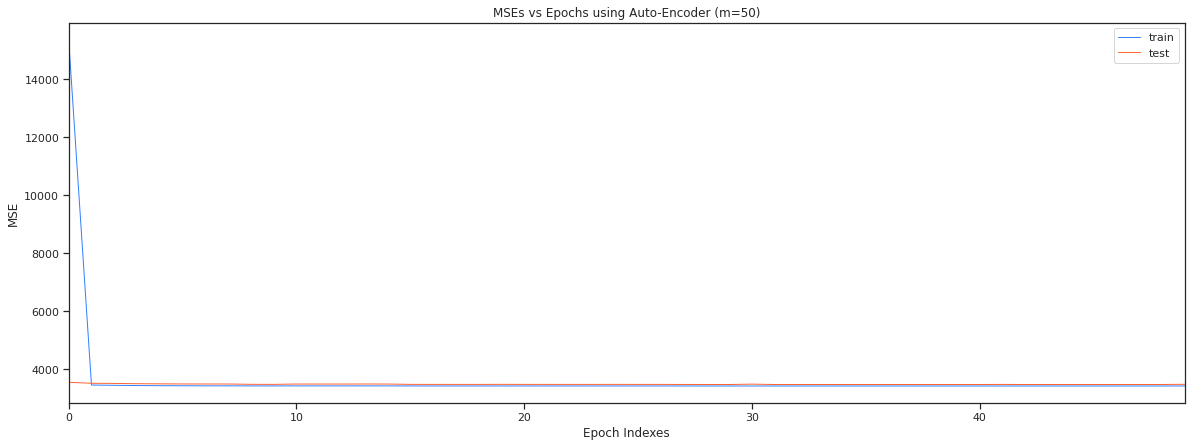

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(history_pcaauto.history["loss"], color='#3380FF', linewidth=1)
plt.plot(history_pcaauto.history["val_loss"], color='#FF6433', linewidth=1)
plt.ylabel('MSE')
plt.xlabel('Epoch Indexes')
plt.xlim(0,49)
plt.title("MSEs vs Epochs using Auto-Encoder (m=50)")
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
input_shape = (148,)
model_auto_encoder_m_star = Sequential()
model_auto_encoder_m_star.add(Dense(148, input_shape=input_shape, activation='relu'))
model_auto_encoder_m_star.add(Dense(23, activation='relu'))
model_auto_encoder_m_star.add(Dense(148, activation='relu'))

loss_function = tf.keras.losses.MeanSquaredError()
model_auto_encoder_optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model_auto_encoder_m_star.compile(loss=loss_function,optimizer=model_auto_encoder_optimizer,metrics=["accuracy"])

start_time_model_auto_m_star = time.time()

history_pca_auto_m_star = model_auto_encoder_m_star.fit(zn_data_frame,zn_data_frame,epochs=4,batch_size=100,validation_split=0.2)

end_time_model_auto_m_star = time.time()

total_time_model_auto_m_star = end_time_model_auto_m_star-start_time_model_auto_m_star

Epoch 1/4
1149/1149 [==============================] - 7s 6ms/step - loss: 13115.0723 - accuracy: 0.9072 - val_loss: 5435.7183 - val_accuracy: 0.9841
Epoch 2/4
1149/1149 [==============================] - 6s 5ms/step - loss: 9290.7422 - accuracy: 0.9862 - val_loss: 5410.5801 - val_accuracy: 0.9884
Epoch 3/4
1149/1149 [==============================] - 6s 5ms/step - loss: 9276.9600 - accuracy: 0.9875 - val_loss: 5398.7642 - val_accuracy: 0.9878
Epoch 4/4
1149/1149 [==============================] - 7s 6ms/step - loss: 9268.7734 - accuracy: 0.9888 - val_loss: 5388.4761 - val_accuracy: 0.9898


In [ ]:
zn_norm_value = np.mean(np.sqrt(np.square(zn_data_frame).sum(axis=1)))

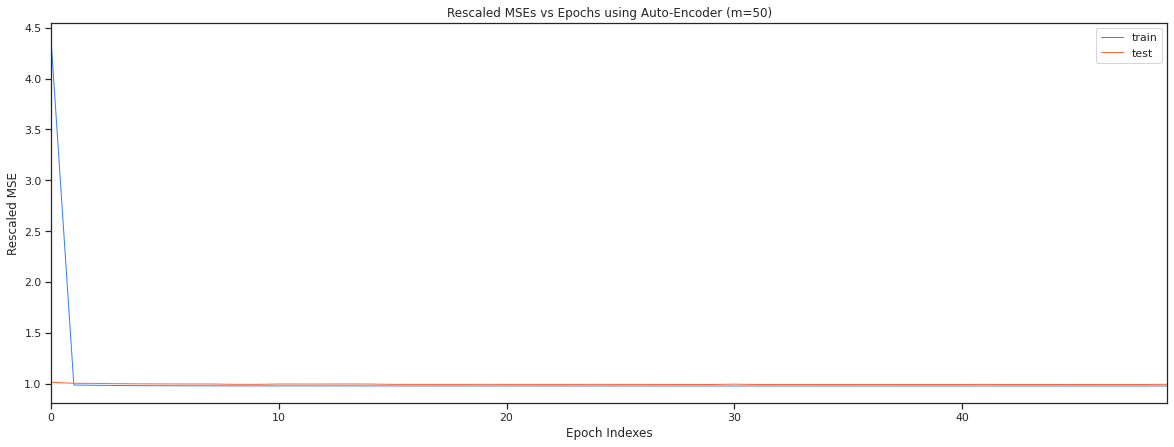

In [ ]:
plt.figure(figsize=(20,7))
plt.plot([number / zn_norm_value for number in history_pcaauto.history["loss"]], color='#3380FF', linewidth=1)
plt.plot([number / zn_norm_value for number in history_pcaauto.history["val_loss"]], color='#FF6433', linewidth=1)
plt.ylabel('Rescaled MSE')
plt.xlabel('Epoch Indexes')
plt.xlim(0,49)
plt.title("Rescaled MSEs vs Epochs using Auto-Encoder (m=50)")
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
model_auto_encoder_weights = model_auto_encoder_m_star.layers[1].weights[0]
model_auto_encoder_thresholds = model_auto_encoder_m_star.layers[1].weights[1]

**Question 5**

In [ ]:
zn_df = zn_data_frame.copy()
kn = tf.keras.activations.relu(np.matmul(zn_df.to_numpy(),model_auto_encoder_weights)+model_auto_encoder_thresholds)
kn

<tf.Tensor: shape=(143570, 23), dtype=float32, numpy=
array([[  0.      , 179.05052 ,   0.      , ...,   0.      , 880.23517 ,
          0.      ],
       [  0.      , 167.98383 ,   0.      , ...,   0.      , 879.80707 ,
          0.      ],
       [  0.      , 313.56885 ,   0.      , ...,   0.      , 855.17865 ,
        136.35251 ],
       ...,
       [  0.      , 170.5838  ,   0.      , ...,   0.      ,  45.975826,
        197.84366 ],
       [  0.      , 140.4096  ,   0.      , ...,   0.      ,  77.9695  ,
        178.51428 ],
       [  0.      , 297.4722  ,   0.      , ...,   0.      , 680.28784 ,
        287.2189  ]], dtype=float32)>

In [ ]:
kn_data = kn.numpy()
kn_data_frame =pd.DataFrame(kn_data)


kn_drop_columns_names = list(map(int,kn_data_frame.columns[np.std(kn_data_frame) == 0]))
kn_data_final = kn_data_frame.drop(kn_data_frame.columns[kn_drop_columns_names],axis=1)   # Dropped the columns with 0 standard deviation

kn_data_scaled = StandardScaler().fit_transform(kn_data_final)

kn_Zdata = pd.DataFrame(kn_data_scaled)

kn_feature_correlation = kn_Zdata.corr()

kn_feature_eigen_values, kn_feature_eigen_vectors = eig(kn_feature_correlation)

kn_feature_eigen_vectors = pd.DataFrame(kn_feature_eigen_vectors)

kn_L = np.sort(kn_feature_eigen_values)[::-1]

idx = np.argsort(-1)

# Computation of PEV for each case m

kn_PEV = []

for i in range(len(kn_feature_correlation)):
    kn_a = sum(kn_L[0:i]/len(kn_feature_correlation))
    kn_PEV.append(kn_a)

# PEV(m) vs m
r_3 = []
for i in range(len(kn_feature_correlation)):
    if sum(kn_L[0:i]) > 0.95*len(kn_feature_correlation):
        r_3.append(i)

print(r_3)

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


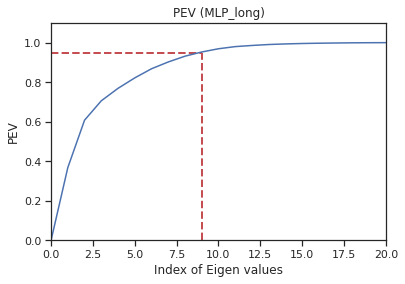

In [ ]:
m_for_eigen = list(range(0, len(kn_feature_correlation)))

plt.plot(m_for_eigen, kn_PEV)
plt.hlines(y=0.95, xmin=0, xmax=int(r_3[0]), color='r', linestyle='--', linewidth=2)
plt.vlines(x=int(r_3[0]), ymin=0, ymax=0.95, color='r', linestyle='--', linewidth=2)
plt.xlabel("Index of Eigen values")
plt.ylabel("PEV")
plt.xlim(0,len(kn_feature_correlation)-1)
plt.ylim(0,1.1)
plt.title("PEV (MLP_long)")
plt.show()

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(y_df)
true_kn_y = lb.transform(y_df)
true_kn_y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

**H3 = 7**

# Sequential MLP Architecture -- MLP <sub>long</sub>

In [ ]:
kn_x_train, kn_x_test, kn_y_train, kn_y_test = train_test_split(kn_data_frame,true_kn_y,test_size=0.2)

input_shape = (23,)
model_kn = Sequential()
model_kn.add(Dense(23, input_shape=input_shape, activation='relu'))
model_kn.add(Dense(10, activation='relu'))
model_kn.add(Dense(7, activation='softmax'))

loss_function = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
model_kn_optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
model_kn.compile(loss=loss_function,optimizer=model_kn_optimizer,metrics=["accuracy"])

start_time_kn = time.time()

history_kn = model_kn.fit(kn_x_train,kn_y_train,epochs=100,batch_size=50,validation_data = (kn_x_test, kn_y_test))

end_time_kn = time.time()

total_time_kn = end_time_kn-start_time_kn

Epoch 1/100
2298/2298 [==============================] - 10s 4ms/step - loss: 2.1257 - accuracy: 0.1605 - val_loss: 1.9093 - val_accuracy: 0.1717
Epoch 2/100
2298/2298 [==============================] - 9s 4ms/step - loss: 1.8904 - accuracy: 0.1754 - val_loss: 1.8752 - val_accuracy: 0.1801
Epoch 3/100
2298/2298 [==============================] - 9s 4ms/step - loss: 1.8584 - accuracy: 0.1934 - val_loss: 1.8623 - val_accuracy: 0.2040
Epoch 4/100
2298/2298 [==============================] - 10s 4ms/step - loss: 1.8259 - accuracy: 0.2093 - val_loss: 1.7870 - val_accuracy: 0.2374
Epoch 5/100
2298/2298 [==============================] - 9s 4ms/step - loss: 1.6471 - accuracy: 0.2828 - val_loss: 1.5935 - val_accuracy: 0.3027
Epoch 6/100
2298/2298 [==============================] - 8s 3ms/step - loss: 1.5459 - accuracy: 0.3170 - val_loss: 1.5614 - val_accuracy: 0.3110
Epoch 7/100
2298/2298 [==============================] - 8s 4ms/step - loss: 1.4884 - accuracy: 0.3337 - val_loss: 1.5062 - val_

In [ ]:
total_time_kn

816.8298077583313

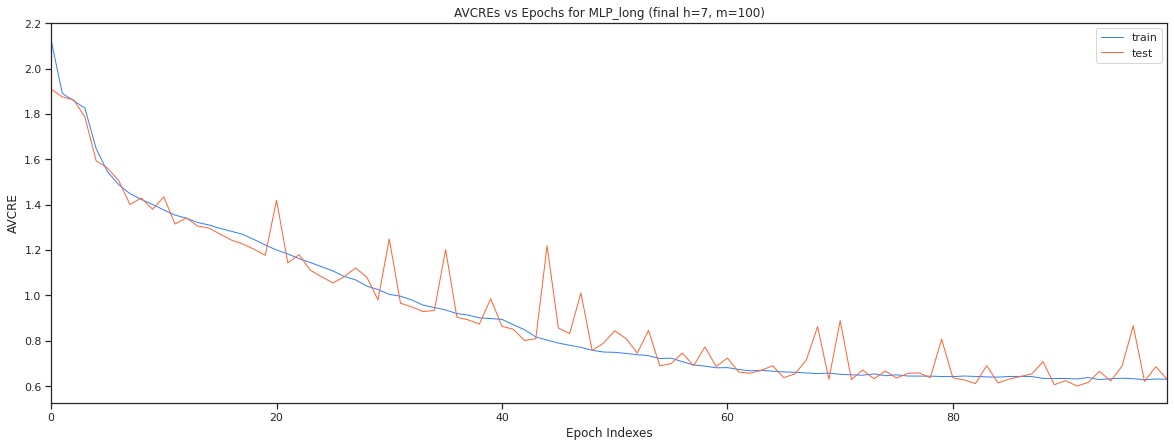

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(history_kn.history["loss"], color='#3380FF', linewidth=1)
plt.plot(history_kn.history["val_loss"], color='#FF6433', linewidth=1)
plt.ylabel('AVCRE')
plt.xlabel('Epoch Indexes')
plt.xlim(0,99)
plt.title("AVCREs vs Epochs for MLP_long (final h=7, m=100)")
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
y_hat_train_kn = model_kn.predict(kn_x_train)
y_hat_train_kn = np.argmax(y_hat_train_kn,axis=1)
y_true_train_kn = np.argmax(kn_y_train,axis=1)
train_kn_confusion_matrix = confusion_matrix(y_hat_train_kn,y_true_train_kn)
train_kn_confusion_matrix = ((train_kn_confusion_matrix.astype('float') / train_kn_confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100).round(2)

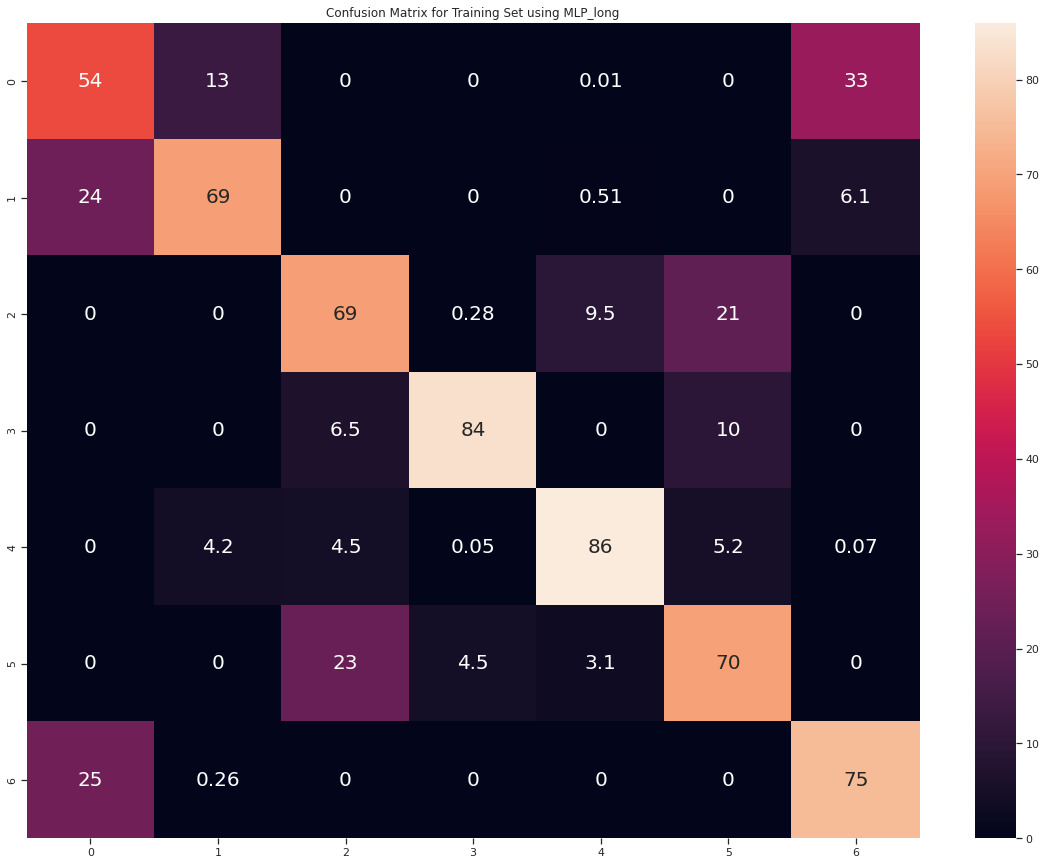

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(train_kn_confusion_matrix,annot=True,annot_kws={"size": 20})
plt.title("Confusion Matrix for Training Set using MLP_long")
plt.show()

In [ ]:
y_hat_test_kn = model_kn.predict(kn_x_test)
y_hat_test_kn = np.argmax(y_hat_test_kn,axis=1)
y_true_test_kn = np.argmax(kn_y_test,axis=1)
test_kn_confusion_matrix = confusion_matrix(y_hat_test_kn,y_true_test_kn)
test_kn_confusion_matrix = ((test_kn_confusion_matrix.astype('float') / test_kn_confusion_matrix.sum(axis=1)[:, np.newaxis]) * 100).round(2)

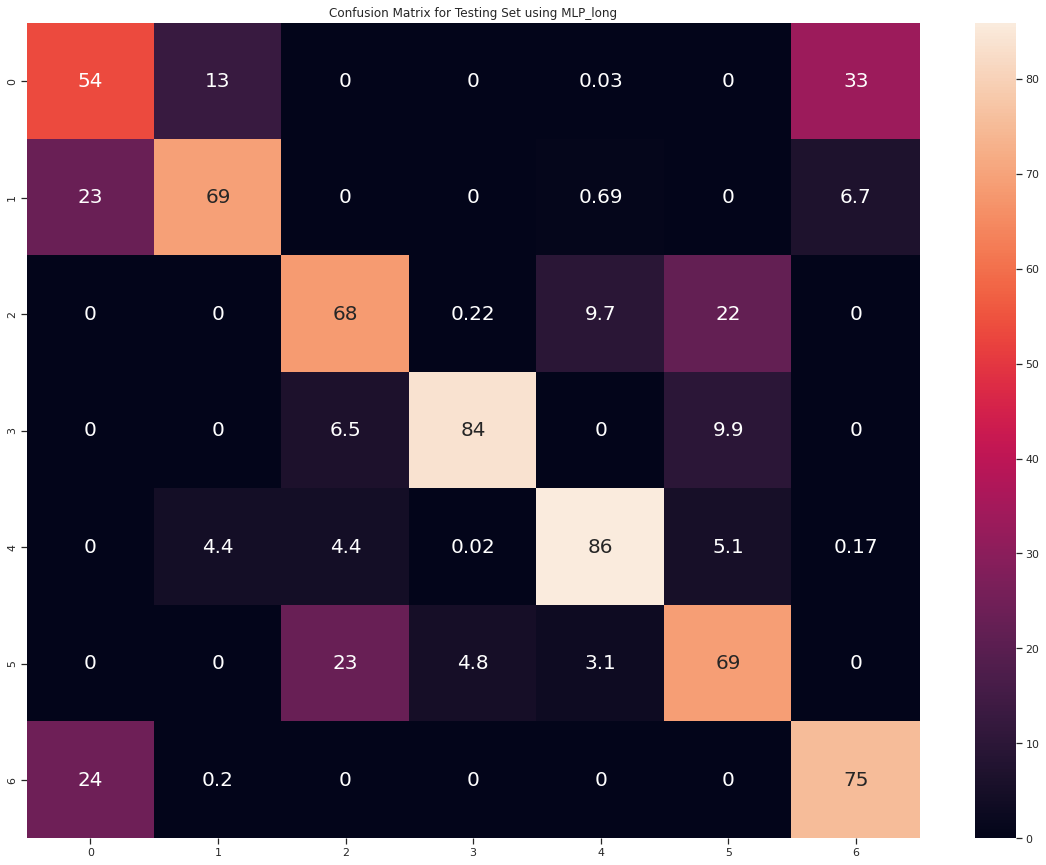

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(test_kn_confusion_matrix,annot=True,annot_kws={"size": 20})
plt.title("Confusion Matrix for Testing Set using MLP_long")
plt.show()